# Predicting heart disease using machine learning

this notebook uses python-based libraries to try and build a machine learning model to predict heart disease  bases on their medical condition(attributes)

**approach**
1. problem defination
2. data
3. evalutation
4. features
5. modeling
6. experimentation

## 1. Problem defination

>Given the medical condition of a patient build a machine learning model to predict wheather the patient has heart disease or not

## 2. Data

>the orignal data came from UCI machine learning repository and there is a version of it on kaggle

## 3. Evalutation

> if we can get to 90 percent accuracy. it would be cool.

## 4. Features 

> The dataset has 14 attributes:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: 
asymptomatic)

trestbps: resting blood pressure in mm Hg on admission to the hospital

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy)

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping)

ca: number of major vessels (0-3) colored by flourosopy

thal: thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: heart disease (1 = no, 2 = yes)


In [4]:
# importing expolratory data analysis and visualization libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want plot in notebook
%matplotlib inline

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# importing evaluation metrics
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score #,plot_roc_curve


## load data

In [6]:
heart_data=pd.read_csv(r'D:\test\github\AI-Nutrionist-using-Gemini-Pro\heart-disease-prediction\resources\training_data\heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## data exploration

the goal is find about data
<!--check list  -->
1. what are we trying to solve <!-- problem defination-->
2. how to treat different columns  <!-- numerical vs categorical data-->
3. what are we missing from data and how to resolve it <!-- missing data handling-->
4. where are outliers and why do we care about them <!-- checkin out outliers-->
5. what canwe add, remove or change data to get more out of it <!--  -->

In [7]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# how many classes are there in output
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

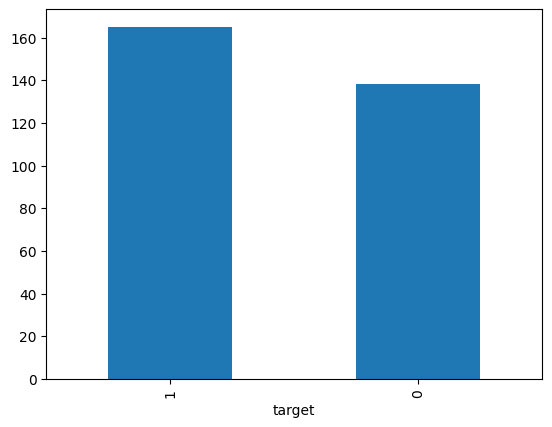

In [10]:
heart_data['target'].value_counts().plot.bar()

In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### finding out null values

In [12]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## comparing the independent variables with the target variable

here we pick the attributes or independent variables which we might think are more relatable to the target variable and try to make connections

### Heart Disease Frequency according to sex

In [14]:
heart_data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
pd.crosstab(heart_data.target,heart_data.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

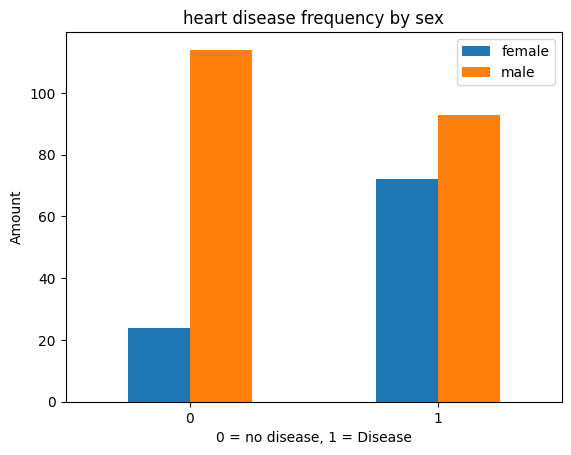

In [16]:
pd.crosstab(heart_data.target,heart_data.sex).plot.bar()
plt.title('heart disease frequency by sex')
plt.xlabel("0 = no disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(['female','male'])
plt.xticks(rotation=0)

In [17]:
heart_data['thalach'].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

## age vs max heart rate (thalach) for heart disease

Text(0, 0.5, 'Max heart rate')

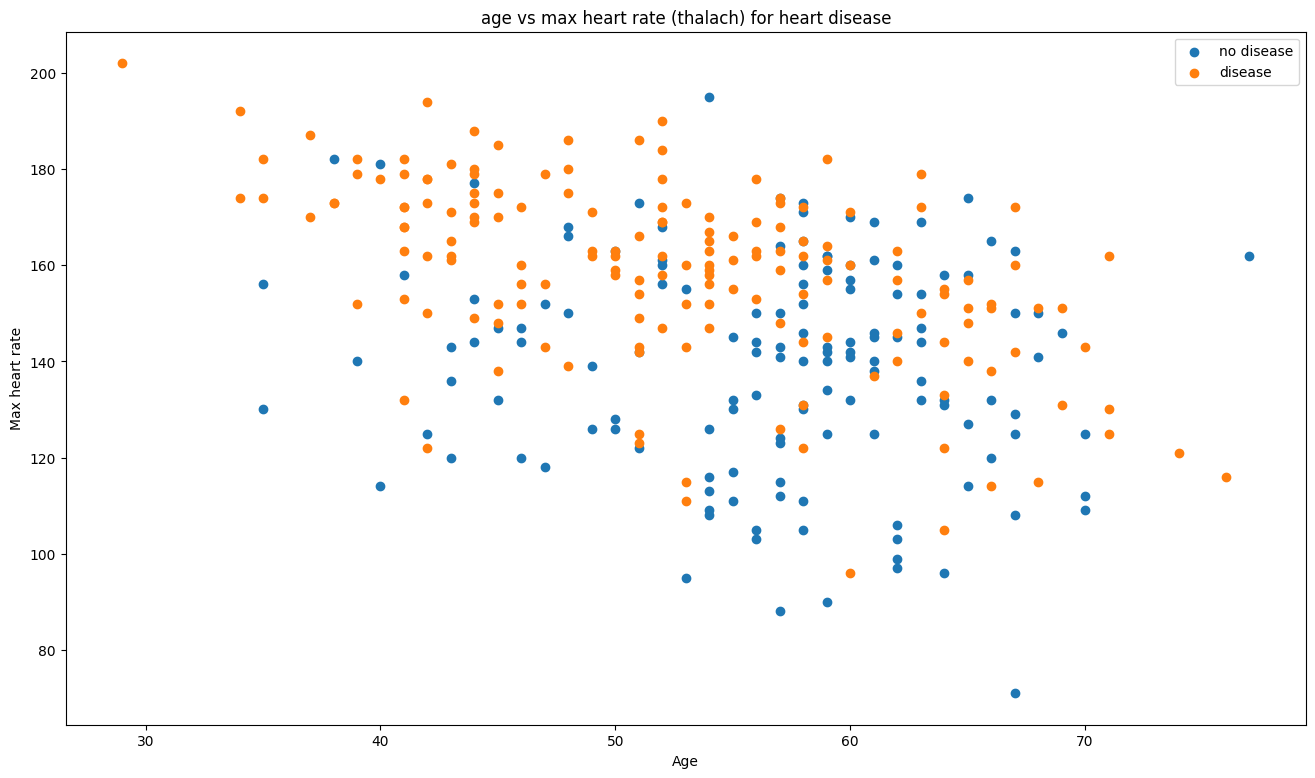

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(heart_data.age[heart_data.target==0],
           heart_data.thalach[heart_data.target==0])
plt.scatter(heart_data.age[heart_data.target==1],
           heart_data.thalach[heart_data.target==1])

plt.title('age vs max heart rate (thalach) for heart disease')
plt.legend(['no disease','disease'])
plt.xlabel('Age')
plt.ylabel('Max heart rate')

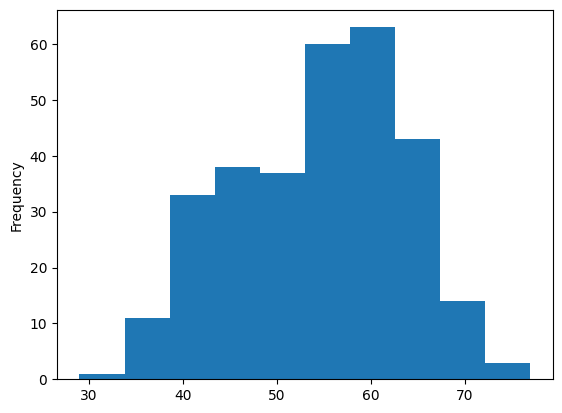

In [19]:
# checking the distribution of age
heart_data.age.plot.hist();

### heart disease frequency per chest pain type

In [20]:
pd.crosstab(heart_data.cp,heart_data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'number of patients')

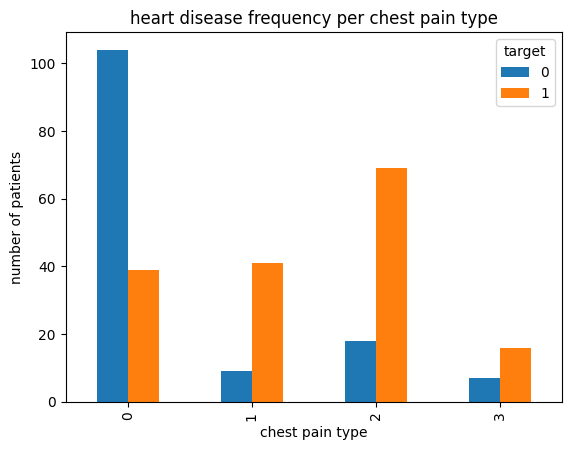

In [21]:
pd.crosstab(heart_data.cp,heart_data.target).plot.bar()
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('number of patients')

<Axes: >

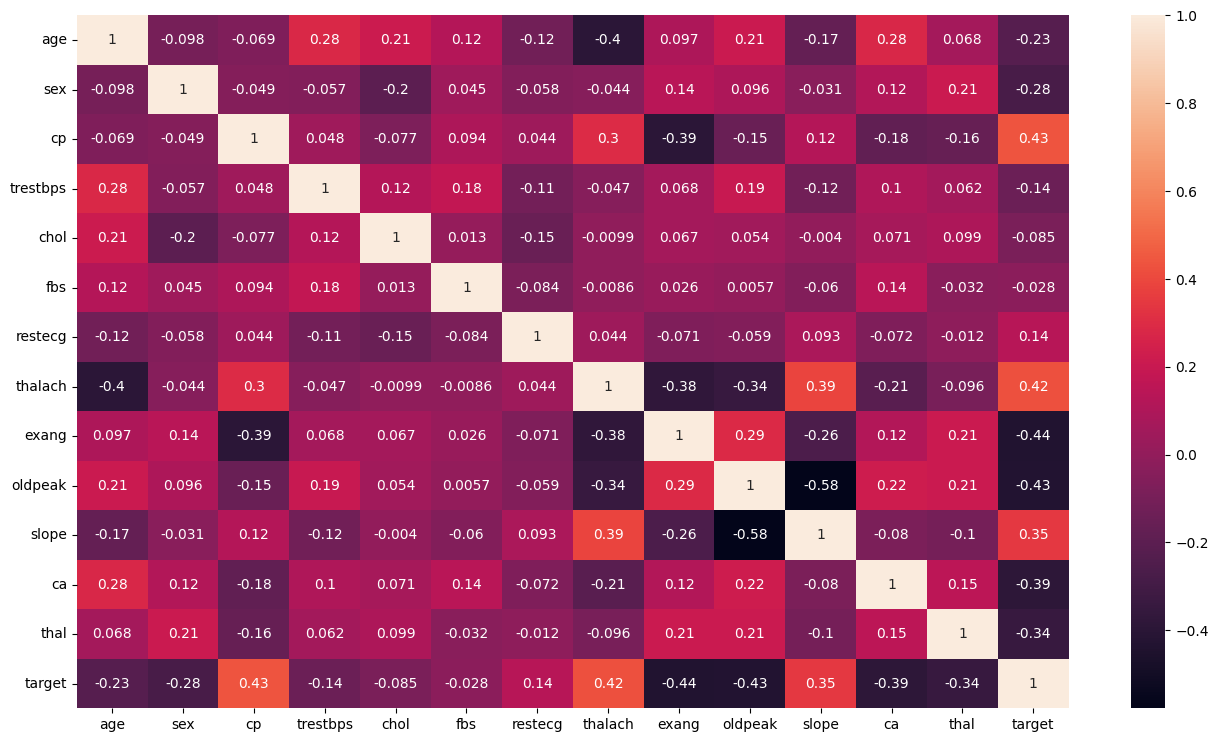

In [22]:
# making correlation matrix 
corr=heart_data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

## 5. modeling

> we are going to use pandas,numpy,matplotlib and seaborn for data analysis 

> we are going to use sklearn for modeling

In [23]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# splitting the data into x and y
# x is feature matrix or independent variables
# y is target or dependent variable

x=heart_data.drop(columns=['target'])

y=heart_data['target']

In [25]:
x.shape , y.shape

((303, 13), (303,))

In [26]:
# splitting train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

**after splitting the data into train and test split**

**we will train the data from the model from train set** 

**and test the predictions of model from test set**

we are going to try 3 different models 
1) logistic regression

2) kneighbours classifiers

3) randomforestclassifier

In [27]:
# put the models in dictionary
models={"Logistic Regression": LogisticRegression(max_iter=2000),
       "K neighbors Classifiers": KNeighborsClassifier(),
       "Random Forest Classifier": RandomForestClassifier()}

# create a function to train and fit the data

def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    function to train (fit) the model and score the model
    models: a dict of models from sklearn
    x_train: train data (no labels)
    x_test: test data (no labels)
    y_train: train data with labels
    y_test: test data with labels
    '''
# for reproducable results
    np.random.seed(4)
    
    #     dict to keep model scores
    model_scores={}
    
    for name, model in models.items():
        
#         train the model
        model.fit(x_train,y_train)
    
#     test the model and store value in model_scores
        model_scores[name]=model.score(x_test,y_test)
    
    return model_scores

In [28]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

In [29]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'K neighbors Classifiers': 0.639344262295082,
 'Random Forest Classifier': 0.819672131147541}

In [33]:
for name, model in models.items():
    with open(f'models/{name.lower().replace(' ',"_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Exported :",name," Model.")

Exported : Logistic Regression  Model.
Exported : K neighbors Classifiers  Model.
Exported : Random Forest Classifier  Model.
